<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import gensim
import os
import re

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

In [38]:
# path = '/Users/mattmastin/Desktop/amazon_clean.csv'

In [2]:
df = pd.read_csv('/Users/mattmastin/Desktop/amazon.csv')

In [3]:
print(df.shape)
df.head()

(28332, 24)


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [4]:
columns = ['id', 'brand', 'primaryCategories', 'reviews.text', 'reviews.title']

df = df[columns]

In [4]:
df.head()

,id,brand,primaryCategories,reviews.text,reviews.title
0,AVpgNzjwLJeJML43Kpxn,Amazonbasics,Health & Beauty,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...
1,AVpgNzjwLJeJML43Kpxn,Amazonbasics,Health & Beauty,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...
2,AVpgNzjwLJeJML43Kpxn,Amazonbasics,Health & Beauty,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...
3,AVpgNzjwLJeJML43Kpxn,Amazonbasics,Health & Beauty,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...
4,AVpgNzjwLJeJML43Kpxn,Amazonbasics,Health & Beauty,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...


In [5]:
STOPWORDS = set(STOPWORDS)

def tokenize(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

In [6]:
df['primaryCategories'] = df['primaryCategories'].apply(tokenize)

In [7]:
df['reviews.text'] = df['reviews.text'].apply(tokenize)
df['reviews.title'] = df['reviews.title'].apply(tokenize)

In [39]:
def doc_stream(path):
    for f in os.listdir(path):
        with open(os.path.join(path, f)) as t:
            text = t.read().strip('\n')
            tokens = tokenize(str(text))
            yield(tokens)

In [37]:
# df.to_csv('amazon_clean.csv', index=False, header=False)
# np.savetxt(df['reviews.text'], fmt=str)

In [40]:
streaming_data = doc_stream(path)

In [8]:
# df['reviews.text'] = df['reviews.text'].dropna()

id2word = corpora.Dictionary((df['reviews.text']))

In [9]:
id2word.doc2bow(tokenize('well they are not duracell'))

[(16, 1)]

In [9]:
import sys
sys.getsizeof(id2word)

56

In [10]:
len(id2word.keys())

9621

In [11]:
corpus = [id2word.doc2bow(text) for text in df['reviews.text']]

# corpus = df['reviews.text']

In [12]:
lda = LdaMulticore(corpus=corpus,
                  id2word=id2word,
                  num_topics=15,
                  passes=10,
                  workers=4)

In [13]:
lda.print_topics()

[(0,
  '0.029*"device" + 0.017*"user" + 0.014*"use" + 0.012*"charging" + 0.011*"friendly" + 0.009*"like" + 0.009*"amazon" + 0.009*"kindle" + 0.009*"problem" + 0.009*"battery"'),
 (1,
  '0.064*"tablet" + 0.034*"amazon" + 0.021*"price" + 0.018*"good" + 0.016*"store" + 0.015*"apps" + 0.014*"google" + 0.014*"tablets" + 0.014*"screen" + 0.011*"hd"'),
 (2,
  '0.107*"good" + 0.063*"batteries" + 0.058*"long" + 0.050*"price" + 0.027*"battery" + 0.025*"brand" + 0.022*"brands" + 0.021*"far" + 0.020*"time" + 0.018*"quality"'),
 (3,
  '0.067*"tablet" + 0.049*"games" + 0.039*"old" + 0.033*"great" + 0.030*"year" + 0.025*"loves" + 0.024*"apps" + 0.019*"movies" + 0.018*"play" + 0.018*"books"'),
 (4,
  '0.251*"great" + 0.110*"price" + 0.051*"product" + 0.041*"good" + 0.038*"value" + 0.034*"works" + 0.025*"deal" + 0.024*"work" + 0.019*"buy" + 0.018*"batteries"'),
 (5,
  '0.048*"yr" + 0.031*"expected" + 0.017*"far" + 0.016*"old" + 0.016*"charge" + 0.013*"controls" + 0.013*"way" + 0.012*"school" + 0.011*"p

In [15]:
words = [re.findall(r'"([^"]*)"', t[1]) for t in lda.print_topics()]

In [16]:
topics = [' '.join(t[0:5]) for t in words]

In [17]:
for t in topics:
    print(t)
    print('\n')

device user use charging friendly


tablet amazon price good store


good batteries long price battery


tablet games old great year


great price product good value


yr expected far old charge


kindle easy use read books


kindle love bought tablet ipad


batteries amazon work buy use


amazon great music sound alexa


screen like size apps ok


tablet kids amazon year free


kids love great product good


loves bought use easy gift


battery long months life better




In [18]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [19]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.219249 -0.010132       1        1  13.950001
6      0.131103 -0.094130       2        1   8.985444
1      0.020529  0.001207       3        1   8.772084
2     -0.271323  0.108752       4        1   8.616218
3      0.214660  0.062435       5        1   8.007106
11     0.093204 -0.060543       6        1   7.398579
4     -0.121310  0.283362       7        1   7.013887
13     0.160289  0.122514       8        1   5.986534
7      0.120676 -0.002234       9        1   5.662584
0     -0.024701 -0.185900      10        1   5.527311
12     0.164915  0.132296      11        1   5.147040
9     -0.040117 -0.003380      12        1   4.623168
10     0.058314 -0.146980      13        1   3.782479
14    -0.209167 -0.097027      14        1   3.669323
5     -0.077823 -0.110241      15        1   2.858240, topic_info=    Category         Freq       Term        Total  loglift  logprob
22   Default  9013.000000      great  9013.000000  30.0000  30.0000
19   Default  7055.000000  batteries  7055.000000  29.0000  29.0000
18   Default  4847.000000      price  4847.000000  28.0000  28.0000
202  Default  2526.000000       kids  2526.000000  27.0000  27.0000
35   Default  5704.000000       good  5704.000000  26.0000  26.0000
..       ...          ...        ...          ...      ...      ...
10   Topic15    54.730652       work  2153.659668  -0.1175  -5.1161
158  Topic15    45.784199    reviews   262.079926   1.8103  -5.2946
4    Topic15    46.620823       item   391.490387   1.4271  -5.2765
22   Topic15    54.139778      great  9013.612305  -1.5600  -5.1269
78   Topic15    46.127827    getting   413.639832   1.3614  -5.2871

[1127 rows x 6 columns], token_table=      Topic      Freq Term
term                      
58        1  0.956789   aa
58        4  0.040219   aa
58       14  0.002117   aa
59        1  0.918434  aaa
59        4  0.056173  aaa
...     ...       ...  ...
8501      9  0.190947  äôm
8501     14  0.763789  äôm
6431      3  0.982902  äôs
6330      6  0.010080  äôt
6330     14  0.977794  äôt

[3587 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 7, 2, 3, 4, 12, 5, 14, 8, 1, 13, 10, 11, 15, 6])

In [20]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, path, limit, start=2, step=3):
    
    coherence_values = []
    model_list = []
    
    for num_topics in range(start, limit, step):
        texts = df['reviews.text']
        model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=id2word,
                            workers=4)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary,
                                       coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

In [24]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word,
                                                        corpus=corpus,
                                                        path=df['reviews.text'],
                                                        start=2,
                                                        limit=40,
                                                        step=6)

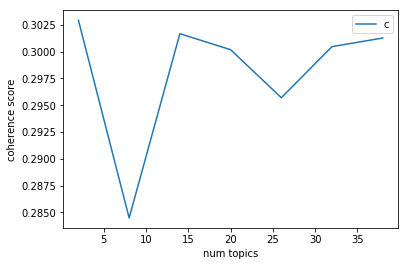

In [27]:
import matplotlib.pyplot as plt

limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel('num topics')
plt.ylabel('coherence score')
plt.legend(('coherence_values'), loc='best')
plt.show();

In [28]:
for m, cv in zip(x, coherence_values):
    print('num topics=', m, 'has coherence value of', round(cv, 4))

num topics= 2 has coherence value of 0.3029
num topics= 8 has coherence value of 0.2845
num topics= 14 has coherence value of 0.3017
num topics= 20 has coherence value of 0.3002
num topics= 26 has coherence value of 0.2957
num topics= 32 has coherence value of 0.3005
num topics= 38 has coherence value of 0.3013


## Findings

* Most of the reviews seem to be about electronics
* Tablets, Kindle, Alexa, etc
* The reviews are generally positive

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling